In [1]:
from datasaurus import *
from fengineer import *

In [2]:
filepath= 'images/feature_eng/'

In [3]:
stem = 'stem'
english = True

#Feature Engineering Params
tf_idf_rate = 0.7
pca_num = 3

data_params={'stem': stem, 'english': english, 'tf_idf_rate': tf_idf_rate, 'pca_num': pca_num}

In [4]:
data = transform_data(sample_data(), stem=stem, english=english)

/Users/griggles/Documents/FLATIRON/project_3/jokes/datasaurus.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  funnies['label'] = 1
/Users/griggles/Documents/FLATIRON/project_3/jokes/datasaurus.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  duds['label'] = 0


In [5]:
fengineer = Fengineer(tf_idf_rate=tf_idf_rate, pca_num=pca_num)

In [6]:
data_feng = fengineer.engineer_features(data)

In [7]:
data_feng_pos = data_feng[data_feng['_label'] == 1]
data_feng_neg = data_feng[data_feng['_label'] == 0]

In [8]:
enhance = 0.001

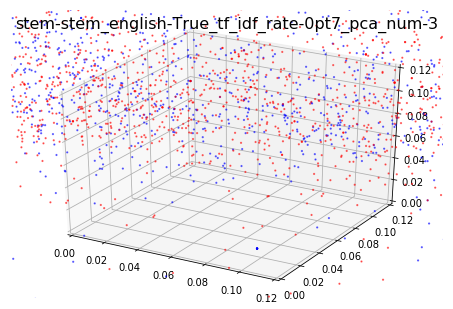

In [9]:
#3D_PCA_FEATURE_VISUALISATION

from mpl_toolkits.mplot3d import Axes3D
folder = 'pca_3d/'
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(data_feng_pos[0], data_feng_pos[1], data_feng_pos[2], s=1.5, alpha = 0.5, c = 'red')
ax.scatter(data_feng_neg[0], data_feng_neg[1], data_feng_neg[2], s=1.5, alpha = 0.5, c = 'blue')

#from mpl_toolkits.mplot3d import Axes3D
#plt.clf()
#fig = pylab.figure()
ax.set_xlim3d(0, 120*enhance)
ax.set_ylim3d(0,120*enhance)
ax.set_zlim3d(0,120*enhance)

data_param_string = '_'.join([str(x) + '-' + str(data_params[x]) for x in data_params.keys()]).replace('.', 'pt')
fig.suptitle(data_param_string, fontsize=16)

filename = filepath + folder + data_param_string

fig.savefig(filename, bbox_inches='tight')

In [41]:
def draw_pca_analysis(pca_num_test_range, exp_vars, directory='pca_vs_variance/'):
    fig = plt.figure()
    minum = min(pca_num_test_range)
    maxum = max(pca_num_test_range)
    step = pca_num_test_range[1] - pca_num_test_range[0]
    axes = fig.add_axes([0.1, 0.1, 1, 1])
    axes.set_xlim(minum, maxum)
    axes.set_ylim(0, 1)
    axes.plot(pca_num_test_range, exp_vars)

    filename = 'pca_range-' + str(minum) + 'to' + str(maxum) + '-step-' + str(step) + '--tf_idf_rate-' + str(tf_idf_rate_test) 
    filename = filename.replace('.', 'pt')
    fig.savefig(filepath + directory + filename, bbox_inches='tight')

In [ ]:
tf_idf_rate_test = 0.2
pca_num_test_range = list(range(25, 525, 25))

exp_vars = []
for pca_num_test in pca_num_test_range:
    fengineer_test = Fengineer(tf_idf_rate=tf_idf_rate_test, pca_num=pca_num_test)
    fengineer_test.engineer_features(data)

    pca_test = fengineer_test.pca
    exp_vars.append(sum(pca_test.explained_variance_ratio_))

draw_pca_analysis(pca_num_test_range, exp_vars)


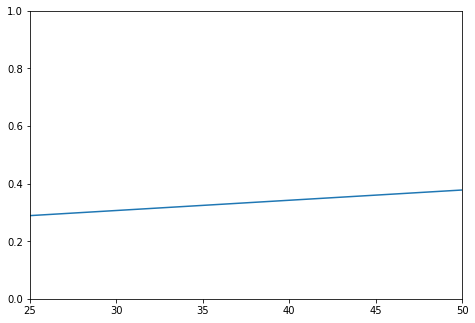

0.6209898072384779

[25,
 50,
 75,
 100,
 125,
 150,
 175,
 200,
 225,
 250,
 275,
 300,
 325,
 350,
 375,
 400,
 425,
 450,
 475]